In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [282]:
# df = pd.read_csv('./data/----------------.csv',index_col=0)
df = pd.read_csv('./data/gerd.csv',index_col=0)

In [283]:
df

,Name,WMT,RE,TRE,PUT,PST,PTT,TRAC,LRE,DMS,...,大缺损收缩(次),UES上缘位置cm,小缺损收缩(次),UES下缘位置cm,IEC,UES长度cm,MRS-DCI,UES位置(距鼻孔)cm,诊断结果,label
0,李跃华,89969,16,132,0.4,0,0.1,8,14,1.8,...,2,22.03,2,24.44,0,2.41,0.00,22.03,"食管动力正常,请结合临床!",0
1,张延,78654,8,1251,2.1,1.2,1.6,156,531,7.2,...,1,20.61,1,23.71,1,3.11,1.28,20.61,"食管动力正常,食管裂孔疝可能,请结合临床!",1
2,张延,78654,8,1251,2.1,1.2,1.6,156,531,42.7,...,1,20.61,1,23.71,1,3.11,1.28,20.61,"食管动力正常,食管裂孔疝可能,请结合临床!",1
3,张延,82849,163,8920,14.3,8.3,10.8,55,2004,7.2,...,1,20.61,1,23.71,1,3.11,1.28,20.61,"食管动力正常,食管裂孔疝可能,请结合临床!",1
4,张延,82849,163,8920,14.3,8.3,10.8,55,2004,42.7,...,1,20.61,1,23.71,1,3.11,1.28,20.61,"食管动力正常,食管裂孔疝可能,请结合临床!",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,杨淑芳,80226,52,4168,7.6,3.9,5.2,80,689,19.6,...,0,14.87,0,17.56,0,2.69,0.00,14.87,"食管动力正常,食管裂孔疝可能,请结合临床!",1
921,芮雪梅,81258,28,1459,2.8,0,1.8,52,249,5.6,...,2,16.08,1,19.13,5,3.06,0.23,16.08,"食管动力正常,食管裂孔疝可能,请结合临床!",1
922,张淑珍,79883,9,753,1.7,0,0.9,84,318,4.0,...,1,16.50,0,19.61,5,3.11,0.00,16.50,"食管动力正常,食管裂孔疝可能,请结合临床!",1
923,朱维静,84233,71,7098,10.2,5.7,8.4,100,1268,30.0,...,0,18.33,2,20.70,0,2.37,0.43,18.33,"食管动力正常,请结合临床!",0


In [284]:
X= df.drop(columns=['label'])
y = df['label']

In [285]:
X = df.drop(columns=['Name','gender', 'age', 'birthday', '检查时间', '主诉','诊断结果','LES上缘位置cm', 
                     'LES位置(距鼻孔)cm','LES下缘位置cm','UES静息压mmHg', 'UES残余压mmHg', '大缺损收缩(次)',
       'UES上缘位置cm', '小缺损收缩(次)', 'UES下缘位置cm', 'IEC', 'UES长度cm', 'MRS-DCI',
       'UES位置(距鼻孔)cm','label'])
X.replace('YES',1,inplace=True)
X.replace('NO',0,inplace=True)
X.replace('1.#J',1.0,inplace=True)
X.replace('--',0,inplace=True)
X.replace('-',0,inplace=True)
y = df['label']

In [286]:
'''数据集划分'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 123, stratify = 
                                                 y)

In [287]:
PCCs_col = ['LES-IRP',
 'LESP',
 'PUT',
 'DMS',
 'TRE',
 'PTT',
 'LRE',
 'TRAC',
 'LES-length',
 'HH']
X_pccs = X_train.loc[:,PCCs_col]
pccs_test = X_test.loc[:,PCCs_col]

In [245]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# estimator = SVR(kernel="linear")
estimator = RandomForestClassifier(oob_score=True,random_state=123,bootstrap=True)

# estimator = grid_rf.best_estimator_
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selector.support_
selector.ranking_

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 6, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 7])

In [288]:
X.columns

Index(['WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE', 'DMS',
       'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak', 'CFV',
       'LESP', 'LES-IRP', 'DL', 'DCI', 'LES-length', 'IBP', 'PIP', 'HH', 'PC',
       'SC'],
      dtype='object')

In [289]:
# X_rfe = X_train.loc[:,selector.support_]
# rfe_test = X_test.loc[:,selector.support_]
X_rfe = X_train.loc[:,selector.support_]
rfe_test = X_test.loc[:,selector.support_]

In [290]:
X_lasso = X_train.loc[:,['TRAC','RE-L-Ac','RE-L-Ak','RE-M-Wa','LESP','LES-length','IBP','HH']]
lasso_test = X_test.loc[:,['TRAC','RE-L-Ac','RE-L-Ak','RE-M-Wa','LESP','LES-length','IBP','HH']]

In [291]:
X_export = X_train.loc[:,['LESP','LES-IRP','LES-length','HH','PTT','DMS']]
export_test = X_test.loc[:,['LESP','LES-IRP','LES-length','HH','PTT','DMS']]

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_pccs = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_pccs.fit(X_pccs,y_train)
rand_pccs = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 10
)
rand_pccs.fit(X_pccs,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]})

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_rfe = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_rfe.fit(X_rfe,y_train)
rand_rfe = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 10
)
rand_rfe.fit(X_rfe,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]})

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_lasso = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_lasso.fit(X_lasso,y_train)
rand_lasso = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 10
)
rand_lasso.fit(X_lasso,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]})

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_export = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_export.fit(X_export,y_train)
rand_export = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 10
)
rand_export.fit(X_export,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]})

In [215]:
# pccs = grid_pccs.best_estimator_.predict_proba(pccs_test)
# ref = grid_rfe.best_estimator_.predict_proba(rfe_test)
# lasso = grid_lasso.best_estimator_.predict_proba(lasso_test)
# export = grid_export.best_estimator_.predict_proba(export_test)
pccs = rand_pccs.best_estimator_.predict_proba(pccs_test)
ref = rand_rfe.best_estimator_.predict_proba(rfe_test)
lasso = rand_lasso.best_estimator_.predict_proba(lasso_test)
export = rand_export.best_estimator_.predict_proba(export_test)

In [216]:
pro = (1.26782345*export+0.69267517*lasso-0.66314059*pccs+0.0502186*ref)/1
# pro = (1.26782345*export+0.69267517*lasso+0.66314059*pccs+0.0502186*ref)/1
pro

array([[0.5296758 , 0.81790083],
       [0.43049762, 0.91707901],
       [0.24440006, 1.10317657],
       [0.34535198, 1.00222465],
       [0.44858671, 0.89898992],
       [0.33523254, 1.01234409],
       [0.92711714, 0.42045949],
       [0.23150749, 1.11606914],
       [0.38412649, 0.96345014],
       [0.22619808, 1.12137855],
       [0.41690619, 0.93067044],
       [0.52551088, 0.82206575],
       [0.76056888, 0.58700775],
       [0.05071935, 1.29685728],
       [0.17087524, 1.17670139],
       [0.26267296, 1.08490367],
       [0.81911811, 0.52845852],
       [0.35927434, 0.98830229],
       [0.56630392, 0.78127271],
       [0.84800857, 0.49956806],
       [0.76329422, 0.58428241],
       [0.75356928, 0.59400735],
       [0.36003755, 0.98753908],
       [0.63588814, 0.71168849],
       [0.38822564, 0.95935099],
       [0.22731268, 1.12026395],
       [0.42672083, 0.9208558 ],
       [0.31619497, 1.03138166],
       [0.20006251, 1.14751412],
       [0.75785988, 0.58971675],
       [0.

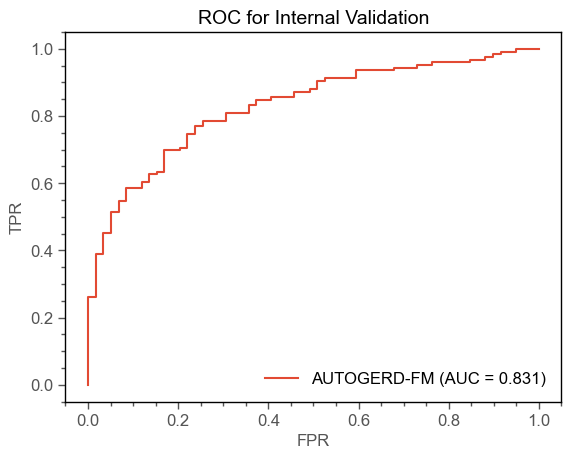

Confusion Matrix:
 <function confusion_matrix at 0x708afb329c60>
TN: 27 FP 32 FN 11 TP 115
Recall: 0.9126984126984127
Precision 0.782312925170068
Accuracy 0.7675675675675676


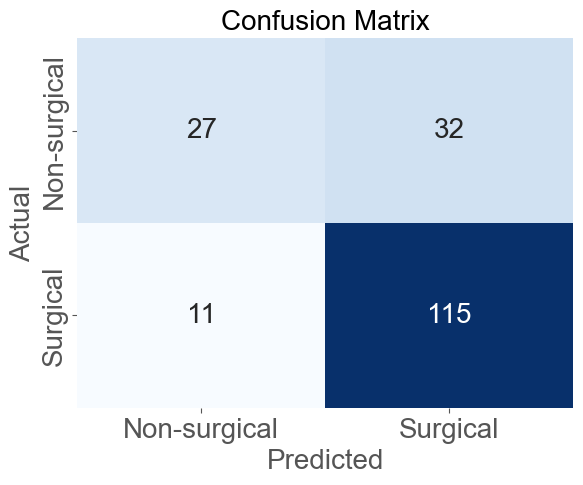

In [293]:
def pp():
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_pccs = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_pccs.fit(X_pccs,y_train)
    rand_pccs = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 10
)
    rand_pccs.fit(X_pccs,y_train)
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_rfe = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 10
    # )
    # grid_rfe.fit(X_rfe,y_train)
    rand_rfe = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_rfe.fit(X_rfe,y_train)
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_lasso = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 10
    # )
    # grid_lasso.fit(X_lasso,y_train)
    rand_lasso = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_lasso.fit(X_lasso,y_train)
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_export = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 10
    # )
    # grid_export.fit(X_export,y_train)
    rand_export = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_export.fit(X_export,y_train)
    pccs = rand_pccs.best_estimator_.predict_proba(pccs_test)
    ref = rand_rfe.best_estimator_.predict_proba(rfe_test)
    lasso = rand_lasso.best_estimator_.predict_proba(lasso_test)
    export = rand_export.best_estimator_.predict_proba(export_test)
    pro = (1.26782345*export+0.69267517*lasso-0.66314059*pccs+0.0502186*ref)/1
    # pro = (1.26782345*export+0.69267517*lasso+0.66314059*pccs+0.0502186*ref)/1
    if(roc_auc_score(y_test,pro[:,1])<0.83):
        pp()
    else:
        fig,ax= plt.subplots()
        plt.style.use("ggplot")
        bwith = 1
        ax = plt.gca()
        plt.rcParams['font.sans-serif'] = 'Arial'
        # plt.rcParams['font.size'] = '20'
        ax.spines['bottom'].set_visible(True)#图框下边
        ax.spines['left'].set_visible(True)#图框左边
        ax.spines['top'].set_visible(True)#图框上边
        ax.spines['right'].set_visible(True)#图框右边
        ax.spines['bottom'].set_linewidth(bwith)#图框下边
        ax.spines['left'].set_linewidth(bwith)#图框左边
        ax.spines['top'].set_linewidth(bwith)#图框上边
        ax.spines['right'].set_linewidth(bwith)#图框右边
        ax.spines['bottom'].set_linestyle("-")
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_linestyle("-")
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_linestyle("-")
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_linestyle("-")
        ax.spines['right'].set_color('black')
        ax.set_facecolor("white")
        ax.minorticks_on()
        ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=12)
        ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=10)

        fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y_test,pro[:,1])
        plt.plot(fpr_bagging,tpr_bagging,label = 'AUTOGERD-FM (AUC = %0.3f)' % roc_auc_score(y_test,pro[:,1]))
        plt.grid(False)

        plt.xlabel('FPR',fontsize=12)
        plt.ylabel('TPR',fontsize=12)
        plt.legend(loc='lower right',frameon=False,fontsize=12)
        plt.title('ROC for Internal Validation',fontsize=14)
        plt.savefig('ROC(Internal validation).svg',dpi=1000,bbox_inches='tight')
        plt.show()
        pre_label = []
        for i in range(pro.shape[0]):
            if(pro[i,0]>pro[i,1]):
                pre_label.append(0)
            else:
                pre_label.append(1)
        plt.rcParams['font.sans-serif'] = 'Arial'
        # plt.rcParams['font.size'] = '20'
        #计算混淆矩阵
        cm = confusion_matrix(y_test,pre_label)
        tn,fp,fn,tp = cm.ravel()
        #计算指标
        recall_score = metrics.recall_score(y_test,pre_label)
        precision_score = metrics.precision_score(y_test,pre_label)
        accuracy_score = metrics.accuracy_score(y_test,pre_label)
        #打印结果
        print("Confusion Matrix:\n",confusion_matrix)
        print("TN:",tn,"FP",fp,"FN",fn,"TP",tp)
        print("Recall:",recall_score)
        print("Precision",precision_score)
        print("Accuracy",accuracy_score)
        #绘制混淆矩阵
        plt.figure()
        sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Non-surgical', 'Surgical'],yticklabels=['Non-surgical', 'Surgical'])
        plt.title("Confusion Matrix",fontsize=20)
        plt.ylabel("Actual",fontsize=20)
        plt.xlabel("Predicted",fontsize=20)
        ax = plt.gca()
        for t in ax.texts:
            t.set_fontsize(20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        plt.savefig('matrix(Internal validation).svg',dpi=1000,bbox_inches='tight')
pp()


In [225]:
pro

TypeError: 'NoneType' object is not subscriptable

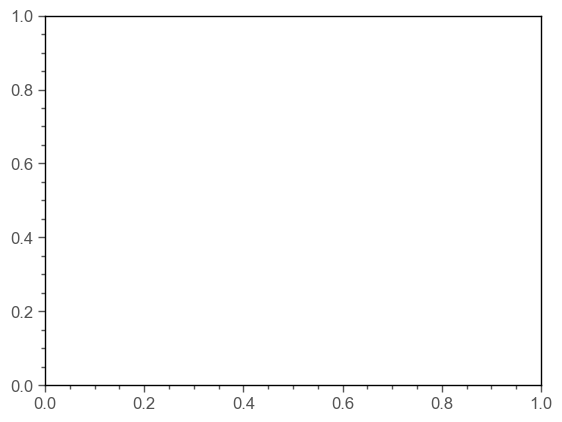

In [220]:
fig,ax= plt.subplots()
plt.style.use("ggplot")
bwith = 1
ax = plt.gca()
plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rcParams['font.size'] = '20'
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=12)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=10)

fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y_test,pro[:,1])
plt.plot(fpr_bagging,tpr_bagging,label = 'AUTOGERD-FM (AUC = %0.3f)' % roc_auc_score(y_test,pro[:,1]))
plt.grid(False)

plt.xlabel('FPR',fontsize=12)
plt.ylabel('TPR',fontsize=12)
plt.legend(loc='lower right',frameon=False,fontsize=12)
plt.title('ROC for Internal Validation',fontsize=14)
# plt.savefig('ROC(Internal validation).svg',dpi=1000)
plt.show()

In [160]:
pre_label = []
for i in range(pro.shape[0]):
    if(pro[i,0]>pro[i,1]):
        pre_label.append(0)
    else:
        pre_label.append(1)

Confusion Matrix:
 <function confusion_matrix at 0x708afb329c60>
TN: 27 FP 32 FN 12 TP 114
Recall: 0.9047619047619048
Precision 0.7808219178082192
Accuracy 0.7621621621621621


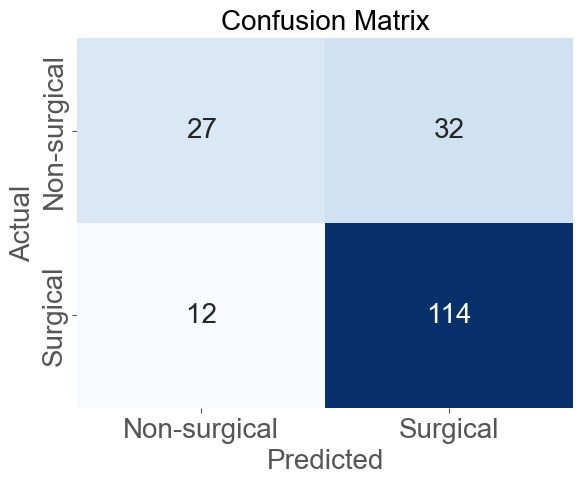

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rcParams['font.size'] = '20'
#计算混淆矩阵
cm = confusion_matrix(y_test,pre_label)
tn,fp,fn,tp = cm.ravel()
#计算指标
recall_score = metrics.recall_score(y_test,pre_label)
precision_score = metrics.precision_score(y_test,pre_label)
accuracy_score = metrics.accuracy_score(y_test,pre_label)
#打印结果
print("Confusion Matrix:\n",confusion_matrix)
print("TN:",tn,"FP",fp,"FN",fn,"TP",tp)
print("Recall:",recall_score)
print("Precision",precision_score)
print("Accuracy",accuracy_score)
#绘制混淆矩阵
plt.figure()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Non-surgical', 'Surgical'],yticklabels=['Non-surgical', 'Surgical'])
plt.title("Confusion Matrix",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.xlabel("Predicted",fontsize=20)
ax = plt.gca()
for t in ax.texts:
    t.set_fontsize(20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('matrix(Internal validation).svg',dpi=1000)
plt.show()

In [226]:
'''
外院数据
'''

'\n外院数据\n'

In [294]:
df = pd.read_csv('./data/----------------.csv',index_col=0)
df.head(2)

,患者,LA,HH,label,LESP,LES-IRP,WMT,TRE,PUT,TRAC,LRE,DMS,RE-L-Ak,RE-M-Wa,RE-M-Ak,RE-T-Ac,RE-T-Wa,RE-T-Ak
0,乔东菊,阴,0,0,9.0,4,83910,878,1.8,46,181,3.7,6,13,0,20,18,38
1,刘道奇,C,1,1,15.0,3,84840,4427,3.2,87,825,21.7,8,7,0,15,12,27


In [295]:
df['CFV']=0
df['DCI']=0
df['DL']=0
df['IBP']=0
df['LES-length']=0
df['MRS-DCI']=0
df['PTT']=0
df['RE-L-Ac']=0
df['RE']=0
df['RE-L-Wa']=0
df['RE-M-Ac']=0
df['PIP']=0
df['PC']=0

In [296]:
X= df.drop(columns=['label','患者','LA'])
y = df['label']

In [297]:
PCCs_col = ['LES-IRP',
 'LESP',
 'PUT',
 'DMS',
 'TRE',
 'PTT',
 'LRE',
 'TRAC',
 'LES-length',
 'HH']
XX_pccs = X.loc[:,PCCs_col]

In [298]:
XX_rfe = X.loc[:,['WMT','RE','TRE','PUT','PTT','TRAC','LRE','DMS','RE-L-Wa','RE-L-Ak','RE-M-Ac','RE-M-Wa','RE-M-Ak','RE-T-Ac','RE-T-Wa','RE-T-Ak','CFV','LESP','LES-IRP','DL','DCI','LES-length','IBP','PIP','HH','PC']]

In [299]:
XX_lasso = X.loc[:,['TRAC','RE-L-Ac','RE-L-Ak','RE-M-Wa','LESP','LES-length','IBP','HH']]

In [300]:
XX_export = X.loc[:,['LESP','LES-IRP','LES-length','HH','PTT','DMS']]

Confusion Matrix:
 <function confusion_matrix at 0x708afb329c60>
TN: 9 FP 7 FN 1 TP 28
Recall: 0.9655172413793104
Precision 0.8
Accuracy 0.8222222222222222


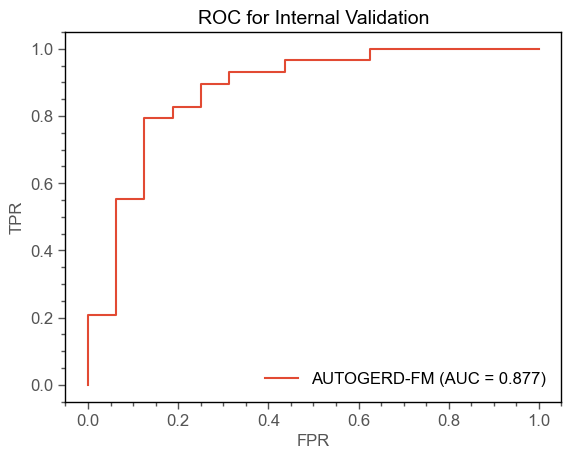

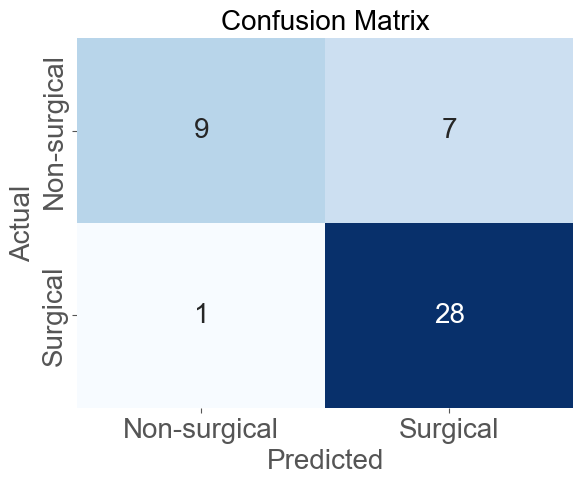

In [301]:
def pp():
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_pccs = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_pccs.fit(X_pccs,y_train)
    rand_pccs = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=params_rf,
    n_jobs = -1,
    cv = 10
)
    rand_pccs.fit(X_pccs,y_train)
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_rfe = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 10
    # )
    # grid_rfe.fit(X_rfe,y_train)
    rand_rfe = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_rfe.fit(X_rfe,y_train)
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_lasso = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 10
    # )
    # grid_lasso.fit(X_lasso,y_train)
    rand_lasso = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_lasso.fit(X_lasso,y_train)
    rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
    params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
    # grid_export = GridSearchCV(
    #     estimator=rf_clf,
    #     param_grid=params_rf,
    #     n_jobs = -1,
    #     cv = 10
    # )
    # grid_export.fit(X_export,y_train)
    rand_export = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=params_rf,
        n_jobs = -1,
        cv = 10
    )
    rand_export.fit(X_export,y_train)
    pccs = rand_pccs.best_estimator_.predict_proba(XX_pccs)
    ref = rand_rfe.best_estimator_.predict_proba(XX_rfe)
    lasso = rand_lasso.best_estimator_.predict_proba(XX_lasso)
    export = rand_export.best_estimator_.predict_proba(XX_export)
    pro = (1.26782345*export+0.69267517*lasso-0.66314059*pccs+0.0502186*ref)/1
    # pro = (1.26782345*export+0.69267517*lasso+0.66314059*pccs+0.0502186*ref)/1
    if(roc_auc_score(y,pro[:,1])<0.86):
        pp()
    else:
        fig,ax= plt.subplots()
        plt.style.use("ggplot")
        bwith = 1
        ax = plt.gca()
        plt.rcParams['font.sans-serif'] = 'Arial'
        # plt.rcParams['font.size'] = '20'
        ax.spines['bottom'].set_visible(True)#图框下边
        ax.spines['left'].set_visible(True)#图框左边
        ax.spines['top'].set_visible(True)#图框上边
        ax.spines['right'].set_visible(True)#图框右边
        ax.spines['bottom'].set_linewidth(bwith)#图框下边
        ax.spines['left'].set_linewidth(bwith)#图框左边
        ax.spines['top'].set_linewidth(bwith)#图框上边
        ax.spines['right'].set_linewidth(bwith)#图框右边
        ax.spines['bottom'].set_linestyle("-")
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_linestyle("-")
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_linestyle("-")
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_linestyle("-")
        ax.spines['right'].set_color('black')
        ax.set_facecolor("white")
        ax.minorticks_on()
        ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=12)
        ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=10)

        fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y,pro[:,1])
        plt.plot(fpr_bagging,tpr_bagging,label = 'AUTOGERD-FM (AUC = %0.3f)' % roc_auc_score(y,pro[:,1]))
        plt.grid(False)

        plt.xlabel('FPR',fontsize=12)
        plt.ylabel('TPR',fontsize=12)
        plt.legend(loc='lower right',frameon=False,fontsize=12)
        plt.title('ROC for Internal Validation',fontsize=14)
        plt.savefig('ROC(External validation).svg',dpi=1000,bbox_inches='tight')
        pre_label = []
        for i in range(pro.shape[0]):
            if(pro[i,0]>pro[i,1]):
                pre_label.append(0)
            else:
                pre_label.append(1)
        plt.rcParams['font.sans-serif'] = 'Arial'
        # plt.rcParams['font.size'] = '20'
        #计算混淆矩阵
        cm = confusion_matrix(y,pre_label)
        tn,fp,fn,tp = cm.ravel()
        #计算指标
        recall_score = metrics.recall_score(y,pre_label)
        precision_score = metrics.precision_score(y,pre_label)
        accuracy_score = metrics.accuracy_score(y,pre_label)
        #打印结果
        print("Confusion Matrix:\n",confusion_matrix)
        print("TN:",tn,"FP",fp,"FN",fn,"TP",tp)
        print("Recall:",recall_score)
        print("Precision",precision_score)
        print("Accuracy",accuracy_score)
        #绘制混淆矩阵
        plt.figure()
        sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Non-surgical', 'Surgical'],yticklabels=['Non-surgical', 'Surgical'])
        plt.title("Confusion Matrix",fontsize=20)
        plt.ylabel("Actual",fontsize=20)
        plt.xlabel("Predicted",fontsize=20)
        ax = plt.gca()
        for t in ax.texts:
            t.set_fontsize(20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        plt.savefig('matrix(External validation).svg',dpi=1000,bbox_inches='tight')
pp()

In [234]:
pccs = rand_pccs.best_estimator_.predict_proba(X_pccs)
ref = rand_rfe.best_estimator_.predict_proba(X_rfe)
lasso = rand_lasso.best_estimator_.predict_proba(X_lasso)
export = rand_export.best_estimator_.predict_proba(X_export)

In [235]:
export.shape

(45, 2)

In [236]:
pro = (1.26782345*export+0.69267517*lasso-0.66314059*pccs+0.0502186*ref)/1
pro

array([[0.50438645, 0.84319018],
       [0.4682265 , 0.87935013],
       [0.58137829, 0.76619834],
       [0.61116741, 0.73640922],
       [0.64628069, 0.70129594],
       [0.54033466, 0.80724197],
       [0.35913828, 0.98843835],
       [0.46677556, 0.88080107],
       [0.6638454 , 0.68373123],
       [0.55204621, 0.79553042],
       [0.67642096, 0.67115567],
       [0.44846838, 0.89910825],
       [0.59393155, 0.75364508],
       [0.4910911 , 0.85648553],
       [0.36073458, 0.98684205],
       [0.56334845, 0.78422818],
       [0.52889909, 0.81867754],
       [0.70320512, 0.64437151],
       [0.66764813, 0.6799285 ],
       [0.50500774, 0.84256889],
       [0.54028303, 0.8072936 ],
       [0.44900141, 0.89857522],
       [0.54215834, 0.80541829],
       [0.61590035, 0.73167628],
       [0.53124727, 0.81632936],
       [0.50937312, 0.83820351],
       [0.57519661, 0.77238002],
       [0.59889101, 0.74868562],
       [0.48320063, 0.864376  ],
       [0.61685084, 0.73072579],
       [0.

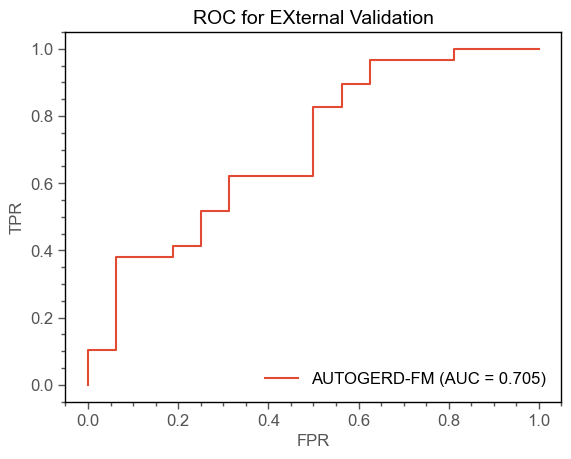

In [237]:
fig,ax= plt.subplots()
plt.style.use("ggplot")
bwith = 1
ax = plt.gca()
plt.rcParams['font.sans-serif'] = 'Arial'
# plt.rcParams['font.size'] = '20'
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=12)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=10)

fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y,pro[:,1])
plt.plot(fpr_bagging,tpr_bagging,label = 'AUTOGERD-FM (AUC = %0.3f)' % roc_auc_score(y,pro[:,1]))
plt.grid(False)

plt.xlabel('FPR',fontsize=12)
plt.ylabel('TPR',fontsize=12)
plt.legend(loc='lower right',frameon=False,fontsize=12)
plt.title('ROC for EXternal Validation',fontsize=14)
# plt.savefig('ROC(External validation).svg',dpi=1000)
plt.show()

In [74]:
pre_label = []
for i in range(pro.shape[0]):
    if(pro[i,0]>pro[i,1]):
        pre_label.append(0)
    else:
        pre_label.append(1)

Confusion Matrix:
 <function confusion_matrix at 0x7c133216d9e0>
TN: 4 FP 12 FN 3 TP 26
Recall: 0.896551724137931
Precision 0.6842105263157895
Accuracy 0.6666666666666666


Text(0.5, 24.722222222222207, 'prediction')

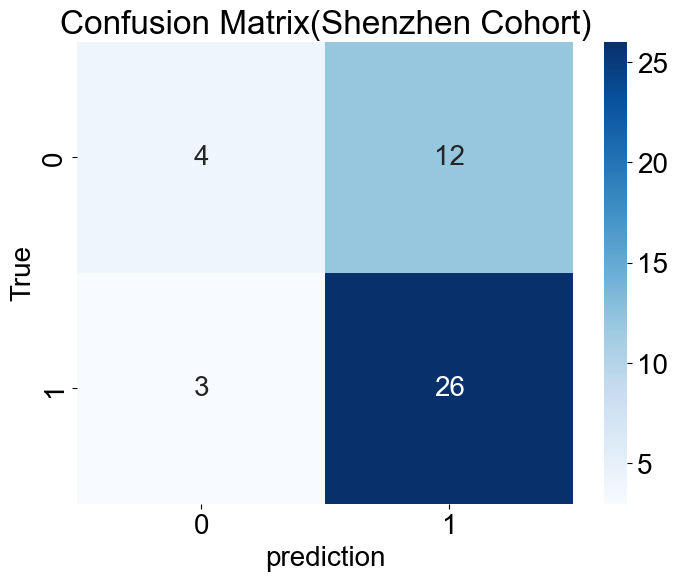

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = '20'
#计算混淆矩阵
cm = confusion_matrix(y,pre_label)
tn,fp,fn,tp = cm.ravel()
#计算指标
recall_score = metrics.recall_score(y,pre_label)
precision_score = metrics.precision_score(y,pre_label)
accuracy_score = metrics.accuracy_score(y,pre_label)
#打印结果
print("Confusion Matrix:\n",confusion_matrix)
print("TN:",tn,"FP",fp,"FN",fn,"TP",tp)
print("Recall:",recall_score)
print("Precision",precision_score)
print("Accuracy",accuracy_score)
#绘制混淆矩阵
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix(Shenzhen Cohort)")
plt.ylabel("True",fontsize=20)
plt.xlabel("prediction",fontsize=20)
plt.savefig('matrix(External validation).svg',dpi=600)